In [36]:
from google.colab import files
uploaded = files.upload()


Saving DataAnalyst.csv to DataAnalyst (1).csv


In [53]:
df = pd.read_csv('DataAnalyst.csv',lineterminator='\n')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2252 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          2252 non-null   object 
 1   job_description    2252 non-null   object 
 2   Rating             2252 non-null   float64
 3   company_name       2252 non-null   object 
 4   location           2252 non-null   object 
 5   headquarters       2252 non-null   object 
 6   size               2252 non-null   object 
 7   Founded            2252 non-null   int64  
 8   type_of_ownership  2252 non-null   object 
 9   industry           2252 non-null   object 
 10  sector             2252 non-null   object 
 11  revenue            2252 non-null   object 
 12  average_salary     2251 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 246.3+ KB


## DATA **Cleaning**

In [54]:
## Removing Duplicates
df = df.dropna()
df = df.drop_duplicates()


In [55]:
## Removing NA
df = df.dropna()


In [56]:
## Removing Unwanted Columns
df.drop(['Unnamed: 0','Easy Apply','Competitors'], axis=1, inplace=True)



In [57]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


In [58]:
#renaming columns for better analysis
df.rename(columns={"Job Title": "job_title"},
inplace=True)
df.rename(columns={"Salary Estimate":
"salary_estimate"}, inplace=True)
df.rename(columns={"Job Description":
"job_description"}, inplace=True)
df.rename(columns={"Company Name":
"company_name"}, inplace=True)
df.rename(columns={"Location": "location"},
inplace=True)
df.rename(columns={"Headquarters":
"headquarters"}, inplace=True)
df.rename(columns={"Size": "size"},
inplace=True)
df.rename(columns={"Type of ownership":
"type_of_ownership"}, inplace=True)
df.rename(columns={"Industry": "industry"},
inplace=True)
df.rename(columns={"Sector": "sector"},
inplace=True)
df.rename(columns={"Revenue": "revenue"},
inplace=True)


In [67]:
df['job_title'] =df['job_title'].replace(['Sr. Data Analyst',
'sr. data analyst', 'Sr Data Analyst', 'sr data analyst','senior data analyst', 'Senior Data Analyst', 'Data Analyst III', 'data analyst iii', 'senior data analyst'],
'Senior Data Analyst', regex=True)
df['job_title'] = df['job_title'].replace(['Data Analyst I', 'data analyst i', 'Data Analyst Junior', 'data analyst junior',
'Junior Data Analyst', 'Junior Data AnalystI', 'Junior Data Analystl'],'Junior Data Analyst', regex=True)
df['job_title'] = df['job_title'].replace(['Data Analyst II',
'data analyst ii', 'Middle Data Analyst'],
'Middle Data Analyst', regex=True)



In [68]:
# plot the most commmon types of jobs
to_plot = df.job_title.value_counts()[:5]
# ax = to_plot.plot(kind='bar',
color=sns.color_palette('Spectral')
to_plot

,count
job_title,
Data Analyst,404
Senior Data Analyst,131
Junior Data Analyst,58
Business Data Analyst,28
Data Quality Analyst,17


Salary Estimate and Trends

In [72]:
df[['MinSalary', 'MaxSalary']] = df['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')
df['MinSalary'] = pd.to_numeric(df['MinSalary'])
df['MaxSalary'] = pd.to_numeric(df['MaxSalary'])
df['MinSalary'] = df['MinSalary'].astype(float)
df['MaxSalary'] = df['MaxSalary'].astype(float)
df['average_salary'] = (df['MaxSalary'] +
df['MinSalary']) / 2
#drop salary estimate(unuseful column)
df.drop(['salary_estimate', 'MinSalary',
'MaxSalary'], axis=1, inplace=True)

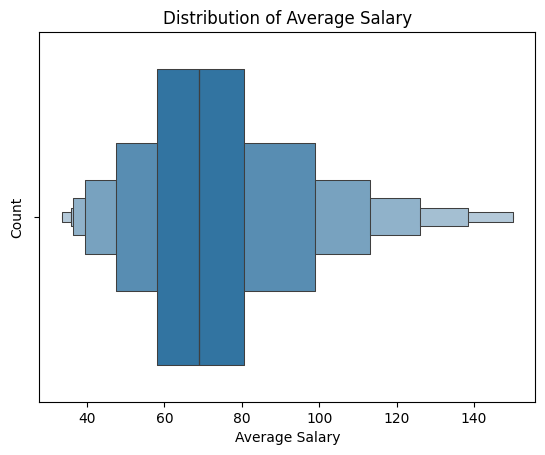

In [74]:
# Average Salary
sns.boxenplot(data=df, x='average_salary')
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.title('Distribution of Average Salary')
plt.show()

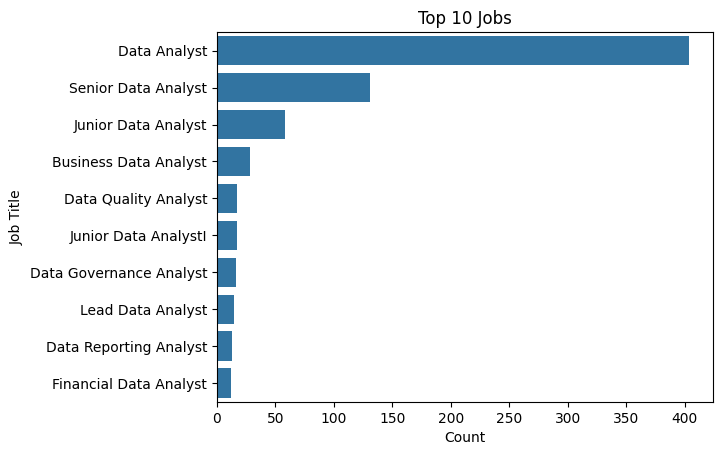

In [75]:
top_jobs = df['job_title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Jobs')
plt.show()

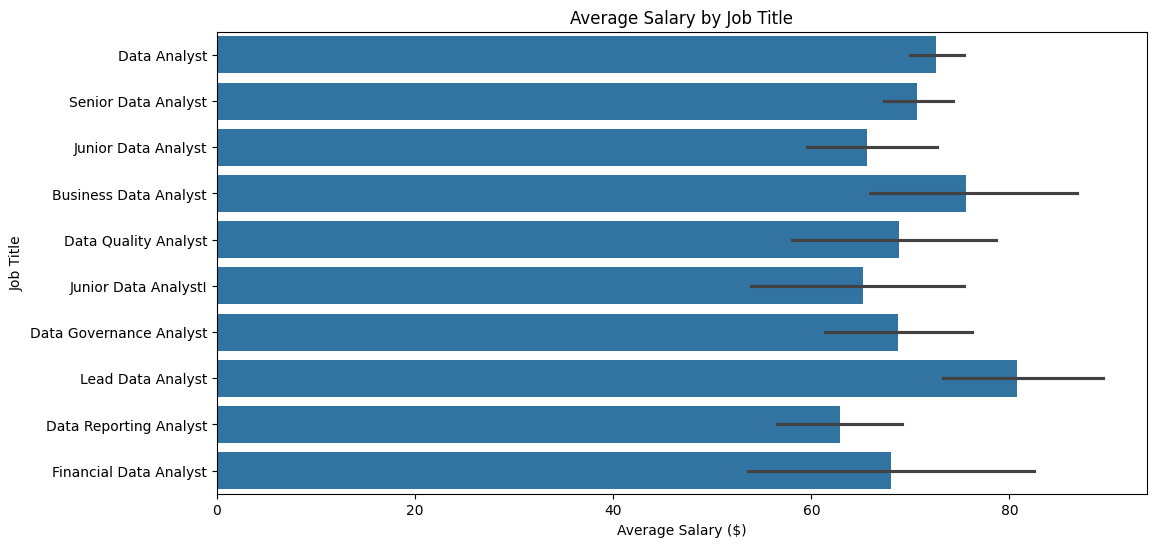

In [76]:
data_analyst_jobs_sorted = df.sort_values(by='average_salary',
ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='average_salary', y='job_title',
data=data_analyst_jobs_sorted, orient='h',
order=data_analyst_jobs_sorted['job_title'].value_counts().head
(10).index)
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

In [78]:
## Salary Trends by Location
job_location = df.groupby('location')["average_salary"].mean().reset_index()
top_10 = job_location.sort_values(by = "average_salary",
ascending=False).head(10)
fig = px.bar(top_10, x='average_salary', y='location',
orientation='h', title='Salary Trends by Location', color =
"location")
fig.update_layout(xaxis_title='AVG Salary (USD)',
yaxis_title='Location', showlegend = False)
fig.show()

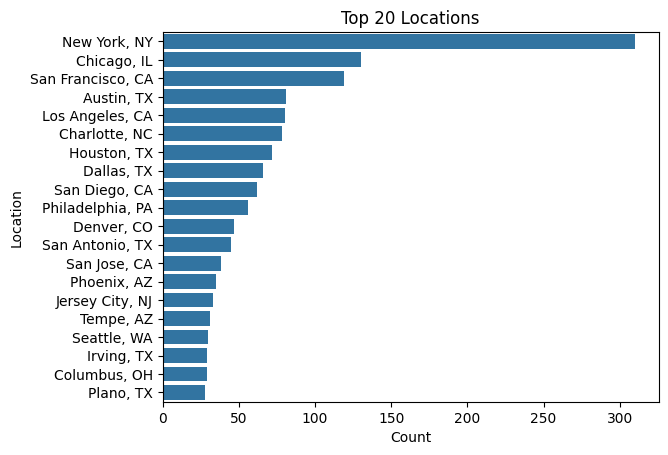

In [79]:
# Top work locations among interviewed
top_locations = df['location'].value_counts().head(20)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Locations')
plt.show()

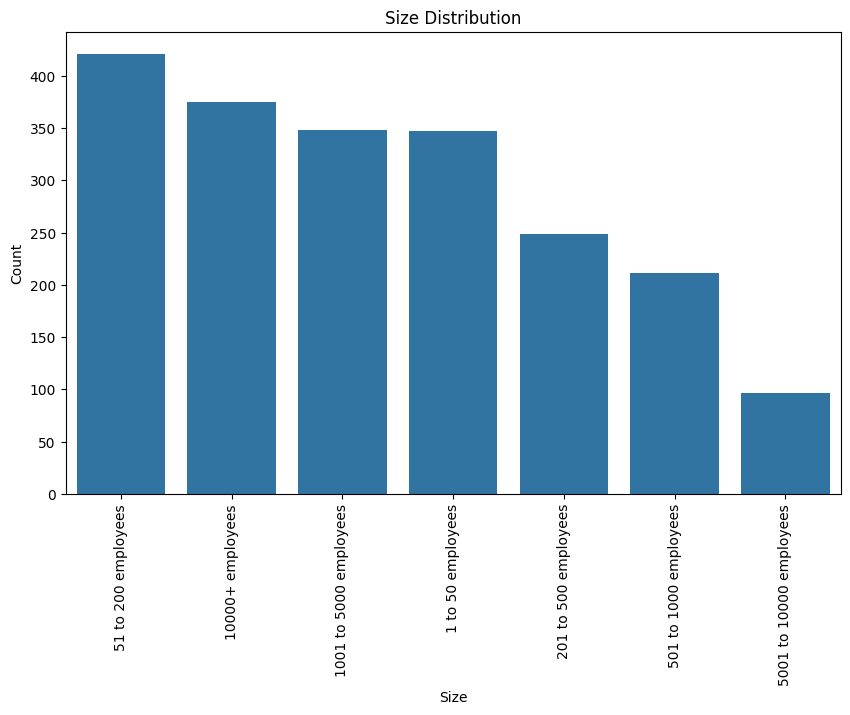

In [81]:
# Companies by Amount of Employees
filtered_size = df[(df['size'] !='-1') & (df['size'] != 'Unknown')]
data_analyst_jobs_size = filtered_size['size'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=data_analyst_jobs_size.index,
y=data_analyst_jobs_size.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.xticks(rotation=90)
plt.show()

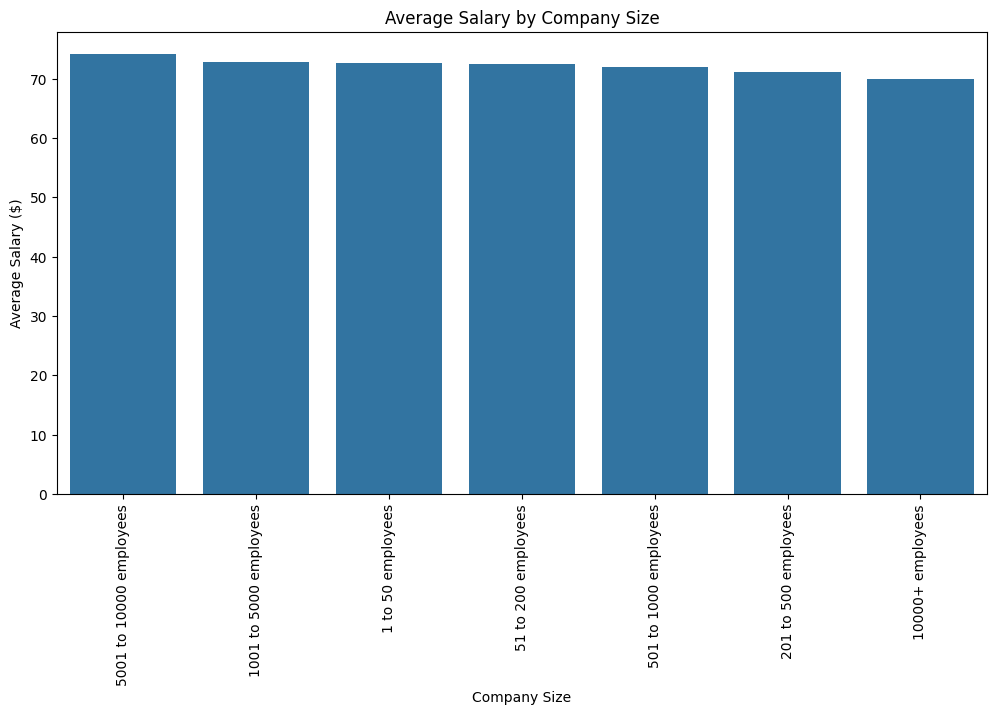

In [85]:
# Salary by Company Size
data_analyst_jobs_filtered = df[(df['size'] != '-1') &
(df['size'] != 'Unknown')]
data_analyst_jobs_sizeXsalary = data_analyst_jobs_filtered.groupby('size')['average_salary'].mean().reset_index()
# Sort the DataFrame by 'AverageSalary' in descending order
data_analyst_jobs_sizeXsalary = data_analyst_jobs_sizeXsalary.sort_values(by='average_salary',
ascending=False)
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='average_salary',
data=data_analyst_jobs_sizeXsalary)
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.show()

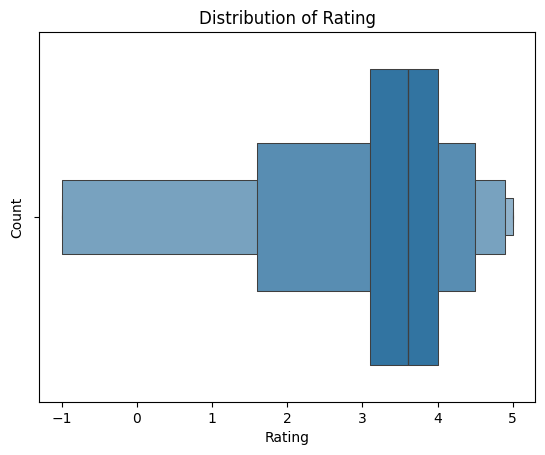

In [87]:
##  Company Rating
sns.boxenplot(data=df, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.show()

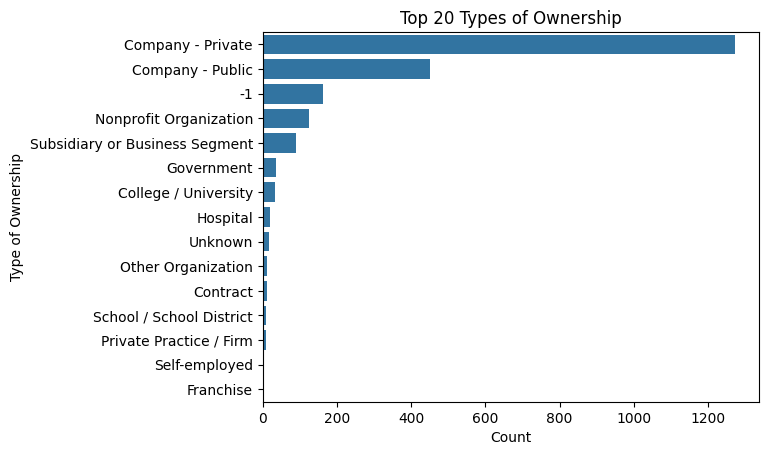

In [88]:
##Type of Ownership
TOP = df[(df['type_of_ownership']
!= '-1') & (df['type_of_ownership'] !='Unknown')]
TOP = df['type_of_ownership'].value_counts().head(20)
sns.barplot(x=TOP.values, y=TOP.index)
plt.xlabel('Count')
plt.ylabel('Type of Ownership')
plt.title('Top 20 Types of Ownership')
plt.show()

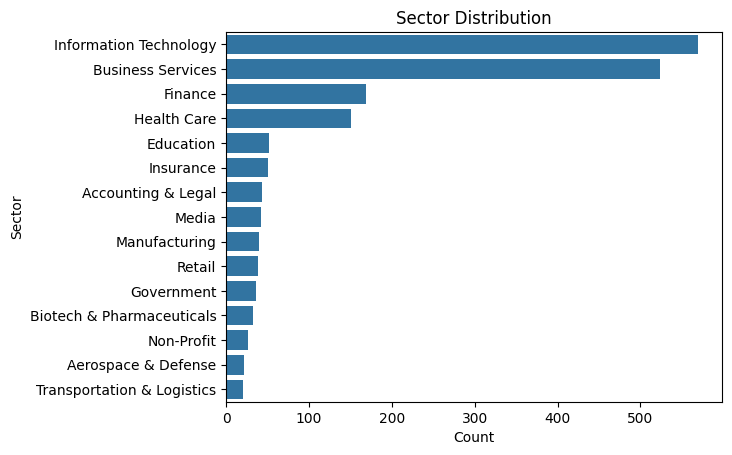

In [90]:
## top Sectors
data_analyst_jobs_sector = df[df['sector'] !='-1']['sector'].value_counts().head(15)
sns.barplot(x=data_analyst_jobs_sector.values,
y=data_analyst_jobs_sector.index)
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Sector Distribution')
plt.show()


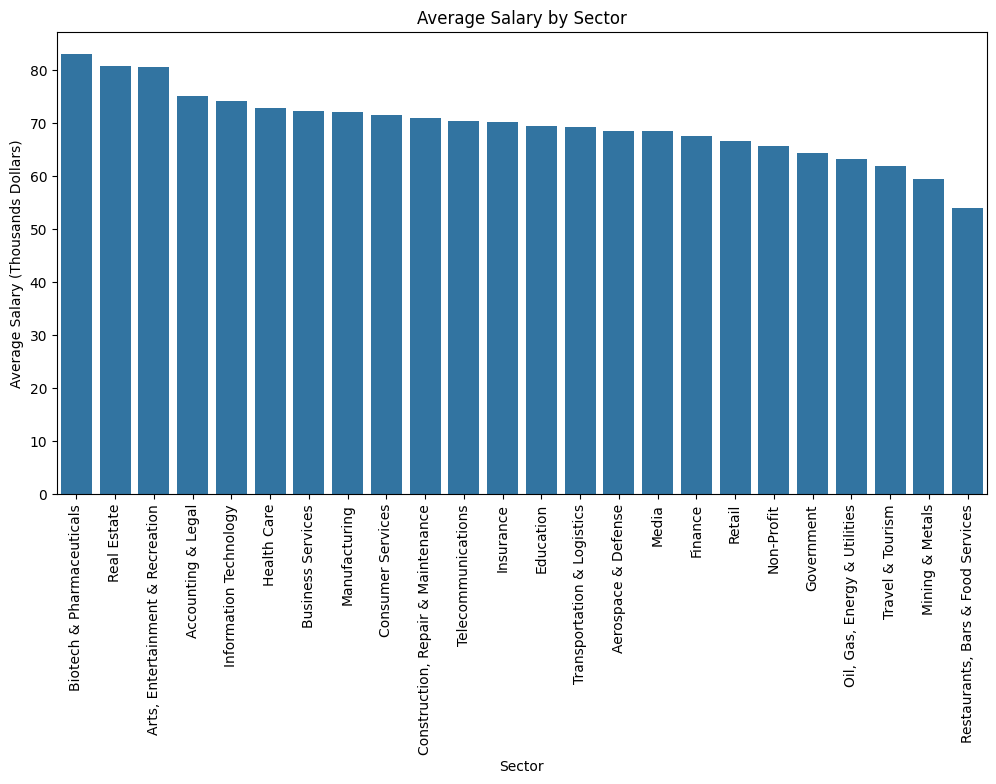

In [92]:
##Average Salary by Sector
average_salary_by_sector = df[df['sector'] !='-1'].groupby('sector')['average_salary'].mean().reset_index()
average_salary_by_sector = average_salary_by_sector.sort_values(by='average_salary',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='average_salary',
data=average_salary_by_sector)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')
plt.title('Average Salary by Sector')
plt.show()